In [1]:
raw_root_dir = "./Geometry/StableHumanTest/"

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import time
#os.getcwd()
print(os.listdir(raw_root_dir))

['.DS_Store', 'image1', 'image5', 'image3']


In [3]:
List_0_111 = list()
List_1_blackdot = list()
List_2_100 = list()

Results = list()
Results.append(List_0_111)
Results.append(List_1_blackdot)
Results.append(List_2_100)

for folder in os.listdir(raw_root_dir):
    #print(folder)
    if folder == '.DS_Store' or folder == 'HumanTest.ipynb':
        pass
    else:
        folderPath = raw_root_dir + '/' + folder + '/'
        # print(folderPath)
        # get txt file and csv file
        for f in os.listdir(folderPath):
            fs = f.split('.')
            #print(fs)
            if fs[len(fs)-1] == 'txt':
                ftxt = f
            if fs[len(fs)-1] == 'csv':
                fcsv = f
        
        print(fcsv)
        print(ftxt)
        
        # get ftxt content
        def parsetxt(filename):
            with open(filename) as f:
                contents = {}
                for num in range(3):
                    f.readline()
                    line = f.readline()
                    contents[num] = line.strip().split()
                    for length in range(len(contents[num])):
                        contents[num][length] = int(contents[num][length])
                    f.readline()
            return contents
        
        
        logDict = parsetxt(folderPath + '/' + ftxt)
        #print(cc)
        print(logDict)
        DFstat = pd.read_csv(folderPath + '/' + fcsv)
        
        # get the effective radius of ellipse
        
        DFstat['reff'] = np.sqrt(DFstat['Major'] * DFstat['Minor'] * 0.25)
        
        Defects = list()
        Defects.append(logDict[0])
        Defects.append(logDict[1])
        Defects.append(logDict[2])
        
        
        for index,(r1,r2) in enumerate(Defects):
            print(r1)
            print(r2)
            # 111
            if index == 0:
                for i in range(r1,r2+1):
                    Results[index].append(DFstat['Major'][i-1])
                    DFstat['reff'][i-1]=DFstat['Major'][i-1] 
            elif index == 1: # Balck Dots
                for i in range(r1,r2+1):
                    Results[index].append(DFstat['reff'][i-1])
            else:
                assert index == 2
                for i in range(r1,r2+1):
                    Results[index].append(DFstat['Major'][i-1])
                    DFstat['reff'][i-1] = DFstat['Major'][i-1] 


1ROI_100kx_4100CL_foil1_results.csv
1ROI_100kx_4100CL_foil1_log.txt
{0: [1, 28], 1: [52, 110], 2: [29, 51]}
1
28


/Users/mingrenshen/anaconda2/envs/defectDection/lib/python3.5/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


52
110
29
51


/Users/mingrenshen/anaconda2/envs/defectDection/lib/python3.5/site-packages/ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


BF X500K, 09 (3)_results.csv
BF X500K, 09 (3)_log.txt
{0: [1, 33], 1: [39, 44], 2: [34, 38]}
1
33


39
44
34
38
0501_300kx_1nm_clhaadf3_0028_results.csv
0501_300kx_1nm_clhaadf3_0028_log.txt
{0: [1, 10], 1: [12, 15], 2: [11, 11]}
1
10


12
15
11
11


In [7]:
print(Results)

[[82.620000000000005, 46.134999999999998, 50.968999999999994, 34.981000000000002, 29.653000000000002, 35.411000000000001, 72.996000000000009, 30.584, 28.454999999999998, 42.606999999999999, 41.601000000000006, 30.148000000000003, 64.198999999999998, 29.131, 37.417000000000002, 74.454999999999998, 41.152999999999999, 31.941999999999997, 46.928000000000004, 25.538, 55.506999999999998, 31.233000000000001, 72.221999999999994, 23.671999999999997, 22.061999999999998, 22.061999999999998, 33.869, 77.837000000000003, 32.091999999999999, 59.108000000000004, 104.861, 34.031999999999996, 62.509999999999998, 188.23699999999999, 76.363, 79.810000000000002, 113.181, 100.89, 61.986999999999995, 64.13600000000001, 117.795, 142.57499999999999, 58.258999999999993, 113.425, 125.36399999999999, 27.535999999999998, 66.507000000000005, 41.546000000000006, 29.695999999999998, 19.869, 21.710000000000001, 24.274000000000001, 22.468000000000004, 26.84, 39.008000000000003, 35.091999999999999, 20.007999999999999, 

In [4]:
print('The average effective radius of 111 is %f'%(np.average(Results[0])))
print('The average effective radius of BlackDots is %f'%(np.average(Results[1])))
print('The average effective radius of 100 is %f'%(np.average(Results[2])))

The average effective radius of 111 is 59.717437
The average effective radius of BlackDots is 8.139279
The average effective radius of 100 is 43.415172


In [7]:
# calculate SEM
print('The SEM radius of 111 is %f'%(np.std(Results[0])/np.sqrt(len(Results[0]))))
print('The SEM radius of 100 is %f'%(np.std(Results[2])/np.sqrt(len(Results[2]))))
print('The SEM radius of BlackDots is %f'%(np.std(Results[1])/np.sqrt(len(Results[1]))))

The average effective radius of 111 is 4.819701
The average effective radius of BlackDots is 0.295431
The average effective radius of 100 is 4.086085


<Figure size 1080x432 with 0 Axes>

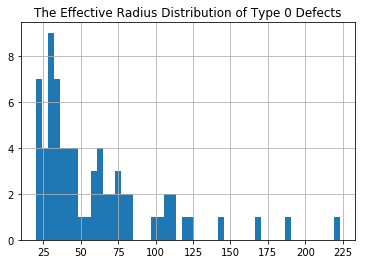

<Figure size 1080x432 with 0 Axes>

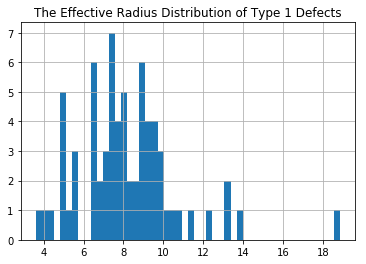

<Figure size 1080x432 with 0 Axes>

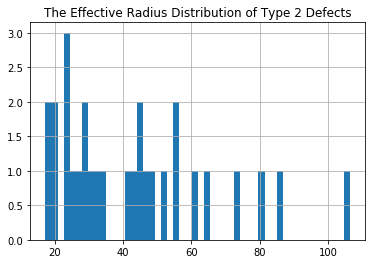

In [10]:
# Plot Size Distribution in each type

for typeInd in range(3):
    DF= pd.DataFrame(columns=['R_eff'])
    for (index,R_eff) in enumerate(Results[typeInd]):
        DF.loc[index] = [R_eff]
    # Ploting    
    histgramFileName = "Hist_Effective_Radius_of_" + str(typeInd)
    fig = plt.figure(figsize=(15,6))
    fig, ax = plt.subplots(1,1)
    DF.hist(bins=50, ax=ax)
    plt.title('The Effective Radius Distribution of Type ' + str(typeInd) + ' Defects')
    fig.savefig(histgramFileName)